<a href="https://colab.research.google.com/github/CarineMS/UFV/blob/main/Semana_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-optimize

In [ ]:
!pip install keras-tuner

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***
## Libs

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


from sklearn.metrics import mean_squared_error, mean_absolute_error
# from skopt import gp_minimize
# from skopt.space import Real, Integer


# import xgboost as xgb
# from xgboost import XGBRegressor

# Estrutura do Código


1.   Load Data
2.   Preprocessing and Visualization
    
    a. Missing Data

3.   Train and Test Split
4.   Standard Scaler
5.   Dimensionality Reduction with PCA
6.   Fully Connected Artificial Neural Network
7.   Neural Network Compile
8.   Training Neural Network
9.   Plotting
10.  Predict Test Sample




***
## Load Data

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ELT579/Data/Dataset_produtividade.csv')

In [6]:
df.shape

(297, 352)

***
## Preprocessing and Visualization

### Missing Data

In [7]:
for i in df.columns:
  if df[i].isna().sum() != 0:
    print(i, df[i].isna().sum())

produtividade 18


In [8]:
df = df.fillna(0)

***
## Dados de Treino e Teste

In [9]:
X = df.drop(['ID', 'produtividade'], axis = 1)
y = df.loc[:,['produtividade']] #df['produtividade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

***
## Standard Scaler

In [10]:
scaleX = StandardScaler() #media 0 e desvio padrão 1
scaleX =  scaleX.fit(X_train)

X_train_sc = scaleX.transform(X_train)
X_test_sc = scaleX.transform(X_test)

# tranfsormando o array em dataframe
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

***
## Dimensionality Reduction with PCA

In [11]:
pca = PCA(n_components= 3)

pca.fit(X_train_sc)

X_train_pca = pca.transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

var = pca.explained_variance_ratio_
var, var.sum()

(array([0.62127874, 0.1818185 , 0.07486958]), 0.8779668174895144)

***
## Fully Connected Artificial Neural Network and Compile

In [17]:
ann = Sequential()

ann.add(Dense(units = 3, input_dim = 3, activation='relu'))
ann.add(Dense(units = 4, activation='relu'))
ann.add(Dense(units = 4, activation='relu'))
ann.add(Dense(units = 1))

ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])
ann.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53 (212.00 B)

 Trainable params: 53 (212.00 B)

 Non-trainable params: 0 (0.00 B)

***
## Training Neural Network

In [18]:
history = ann.fit(X_train_pca, y_train, batch_size= 10, validation_split=0.1, epochs = 500)

Epoch 1/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 400106.8438 - mae: 594.7266 - val_loss: 366858.5312 - val_mae: 581.9830
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 411560.4062 - mae: 602.4091 - val_loss: 365943.5312 - val_mae: 581.1718
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 403700.8438 - mae: 589.2975 - val_loss: 365156.0938 - val_mae: 580.4698
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 375982.7500 - mae: 564.7350 - val_loss: 364495.4062 - val_mae: 579.8784
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 389346.3750 - mae: 580.0871 - val_loss: 363884.5625 - val_mae: 579.3286
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 403211.3438 - mae: 601.4191 - val_loss: 363354.8750 - val_mae: 578.8489
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 380677.2812 - mae: 576.0284 - val_loss: 362898.3125 - val_mae: 578.4324
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 387600.6250 - mae: 579.

***
## Plotting

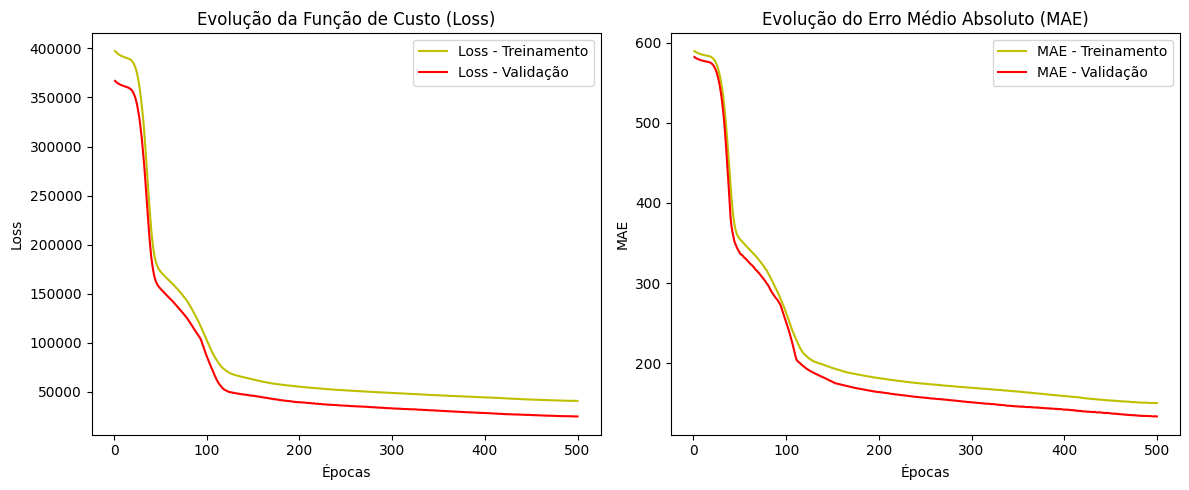

In [21]:
import matplotlib.pyplot as plt

# Supondo que 'history' já foi gerado durante o treinamento do modelo
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(loss) + 1)

# Criando uma figura com dois subplots
plt.figure(figsize=(12, 5))

# Gráfico de Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'y', label="Loss - Treinamento")
plt.plot(epochs, val_loss, 'r', label="Loss - Validação")
plt.title("Evolução da Função de Custo (Loss)")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.legend()

# Gráfico de MAE
plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'y', label="MAE - Treinamento")
plt.plot(epochs, val_mae, 'r', label="MAE - Validação")
plt.title("Evolução do Erro Médio Absoluto (MAE)")
plt.xlabel("Épocas")
plt.ylabel("MAE")
plt.legend()

# Exibir os gráficos
plt.tight_layout()
plt.show()


***
## Predict Test Sample

In [19]:
y_pred = ann.predict(X_test_pca)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step


In [20]:
linear = LinearRegression()
linear.fit(y_test, y_pred)

r2 = linear.score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = (mean_squared_error(y_test, y_pred))**0.5

print('R2 = ', round(r2, 2))
print("MAE = ", round(mae, 2))
print("RMSE = ", round(rmse, 2))

R2 =  0.28
MAE =  140.3
RMSE =  176.1


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


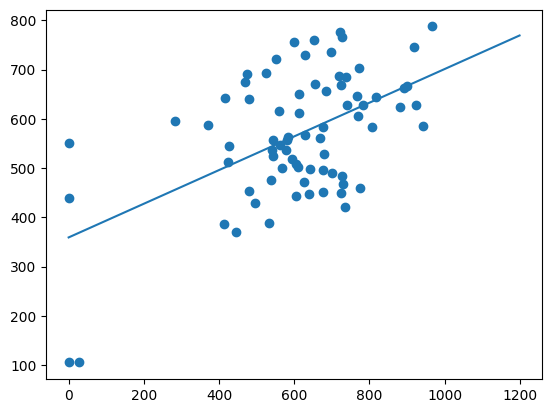

In [22]:
#predição dos dados de teste
y_pred = ann.predict(X_test_pca)

y = np.arange(0, 1200)
y = np.expand_dims(y, axis=1)

yp = linear.predict(y)

plt.scatter(y_test, y_pred)
plt.plot(y, yp)
plt.show()